# Project Navigation Guidelines

In [1]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Label Coords (Label Model)

>> Experiment 8 (Exp8) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [1]:
exp = 8
trial = 1
'''
Trial 1
Algorithms use calcLocation mechanic
Sampling done within time period of 5s.
'''
None

# Core Libraries

In [2]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# [Exploratory Data Analysis]

# Prepare/Load Relevant Dataset

In [4]:
# Read csv file into dataframe.
csvfile = pd.read_csv('E8_All_Proc_200320v1.csv')
relDf = pd.DataFrame(csvfile)
# print(relDf)
relDf.columns = relDf.columns.str.strip() #strip unintended whitespaces

# print("Columns: ", relDf.columns)
# relDf = relDf[['Date','Time', 'ID2', 'RSSI', 'Location']] #select relevant columns
print(relDf)

# # Convert timestamp to date, time
# dateSeries = []
# timeSeries = []
# for ts in relDf['timestamp']:
#     dateData, timeData = str(ts).split("T")
#     timeData = timeData[:timeData.find("+")]
#     dateSeries.append(dateData)
#     timeSeries.append(timeData)
# #     print("Date: ", dateData)
# #     print("Time: ", timeData)

# relDf.insert(0, "Date", dateSeries)
# relDf.insert(1, "Time", timeSeries)
relDf = relDf.drop(columns = ["timestamp", "13", "14"])

relDf

                     timestamp   1   2   3   4   5   6   7   8    9  10  11  \
0    2020-03-20T16:12:31+08:00 -61 -95   0   0 -89   0 -98   0    0   0 -98   
1    2020-03-20T16:12:39+08:00 -64 -85   0   0 -92   0   0   0    0   0   0   
2    2020-03-20T16:12:47+08:00 -68 -83   0 -79 -88   0   0   0    0   0 -94   
3    2020-03-20T16:12:55+08:00 -60   0   0 -88 -92   0 -98   0 -101   0   0   
4    2020-03-20T16:13:04+08:00 -65   0 -83 -87 -92   0 -90   0  -99   0   0   
..                         ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..   
371  2020-03-20T18:06:18+08:00   0   0   0   0 -79   0   0   0    0 -95   0   
372  2020-03-20T18:06:26+08:00   0   0   0   0 -73   0   0   0    0 -95 -80   
373  2020-03-20T18:06:34+08:00   0   0   0 -81 -77   0 -78   0    0 -92   0   
374  2020-03-20T18:06:42+08:00   0   0   0 -81 -79   0   0   0    0   0   0   
375  2020-03-20T18:12:44+08:00 -86 -81 -97 -83 -74 -77 -80 -79  -85 -89 -80   

     12  13  14 label  
0     0   0   0   1,1  
1  

1   2   3   4   5   6   7   8    9  10  11  12 label
0   -61 -95   0   0 -89   0 -98   0    0   0 -98   0   1,1
1   -64 -85   0   0 -92   0   0   0    0   0   0   0   1,1
2   -68 -83   0 -79 -88   0   0   0    0   0 -94   0   1,1
3   -60   0   0 -88 -92   0 -98   0 -101   0   0   0   1,1
4   -65   0 -83 -87 -92   0 -90   0  -99   0   0   0   1,1
..   ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..   ...
371   0   0   0   0 -79   0   0   0    0 -95   0 -87   7,7
372   0   0   0   0 -73   0   0   0    0 -95 -80 -82   7,7
373   0   0   0 -81 -77   0 -78   0    0 -92   0 -92   7,7
374   0   0   0 -81 -79   0   0   0    0   0   0 -88   7,7
375 -86 -81 -97 -83 -74 -77 -80 -79  -85 -89 -80 -90   7,7

[376 rows x 13 columns]

# Resample/Reshape Dataset

In [5]:
resampledDS = relDf
tempSeries = resampledDS['label']
resampledDS = resampledDS.drop(columns=['label'])
resampledDS["label"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()*(-1) #convert neg RSS readings to positive
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3) 
y_train = y_train.reshape(len(y_train),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
print("estimated k value: ", k_value_rootN)
print("X_test: ", X_test)
print("y_test: ", y_test)

estimated k value:  17
X_test:  [[ 0 82  0 ... 97  0 98]
 [65 90  0 ...  0  0  0]
 [ 0  0 74 ...  0 86 87]
 ...
 [95 83  0 ...  0 83 94]
 [ 0  0 75 ...  0 91  0]
 [ 0 94 95 ... 88 94  0]]
y_test:  [['1,1']
 ['1,1']
 ['1,13']
 ['7,7']
 ['1,1']
 ['7,7']
 ['7,7']
 ['7,1']
 ['1,13']
 ['1,7']
 ['1,13']
 ['7,7']
 ['1,13']
 ['7,7']
 ['1,1']
 ['7,1']
 ['7,1']
 ['1,7']
 ['1,7']
 ['1,13']
 ['7,7']
 ['1,1']
 ['1,1']
 ['1,7']
 ['7,7']
 ['1,7']
 ['1,13']
 ['1,1']
 ['7,7']
 ['7,7']
 ['1,13']
 ['7,7']
 ['1,1']
 ['1,1']
 ['7,7']
 ['1,1']
 ['1,7']
 ['1,7']
 ['1,13']
 ['1,7']
 ['1,13']
 ['1,7']
 ['7,7']
 ['1,1']
 ['1,13']
 ['7,1']
 ['7,1']
 ['7,7']
 ['7,7']
 ['1,13']
 ['1,13']
 ['7,1']
 ['1,13']
 ['1,1']
 ['1,13']
 ['1,7']
 ['1,1']
 ['1,13']
 ['7,1']
 ['1,1']
 ['7,1']
 ['1,13']
 ['7,1']
 ['7,1']
 ['1,7']
 ['1,7']
 ['1,7']
 ['1,1']
 ['7,1']
 ['7,1']
 ['7,7']
 ['1,7']
 ['7,7']
 ['1,1']
 ['1,1']
 ['7,7']
 ['1,1']
 ['7,7']
 ['1,7']
 ['7,1']
 ['1,7']
 ['1,1']
 ['1,13']
 ['1,7']
 ['1,1']
 ['7,1']
 ['1,7']
 ['

# Parameter Optimisation

# KNN Algorithm - Distance Calculation

In [6]:
#Function calculates euclidean distance between two n-dimensional data instances 
def euclideanDistance(instance1, instance2):
    #handles if instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    '''
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
    uses 2-norm frobenius norm and returns euclidean distance
    '''
    return np.linalg.norm(instance1 - instance2) #euclidean distance

# KNN Algorithm - Determining Neighbours

In [7]:
#Function finds nearest neighbours; nearest -> smallest euclidean distance
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=euclideanDistance):
    """
    get_neighbors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = [] #empty distance array
    
    #calculates euclidean distance between test_instance and ALL other instances in training_set
    for index in range(len(training_set)):
        dist = euclideanDistance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors # The list neighbors contains 3-tuples with (index, dist, label)

In [8]:
# Get Neighbours
outArray = []
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rootN, 
                              distance=euclideanDistance)
#     print(i,
#           X_test[i],
#           y_test[i],
#           neighbors)
    
    outArray.append([i,
          X_test[i],
          y_test[i],
          neighbors])

out_df = pd.DataFrame(outArray, columns=['i', 'X_test', 'y_test', 'neighbours'])
out_df.head()
# out_df.tail()

i                                      X_test  y_test  \
0  0    [0, 82, 0, 0, 0, 0, 96, 0, 0, 97, 0, 98]   [1,1]   
1  1   [65, 90, 0, 87, 93, 0, 98, 0, 0, 0, 0, 0]   [1,1]   
2  2  [0, 0, 74, 0, 0, 84, 89, 0, 93, 0, 86, 87]  [1,13]   
3  3     [0, 77, 0, 0, 0, 82, 0, 84, 0, 0, 0, 0]   [7,7]   
4  4     [64, 85, 0, 0, 92, 0, 0, 0, 0, 0, 0, 0]   [1,1]   

                                          neighbours  
0  [([0, 82, 0, 0, 0, 0, 91, 0, 0, 0, 0, 99], 97....  
1  [([60, 83, 0, 90, 86, 0, 0, 0, 0, 0, 0, 0], 98...  
2  [([0, 0, 80, 0, 0, 91, 0, 0, 92, 0, 89, 89], 8...  
3  [([0, 91, 72, 0, 0, 93, 0, 0, 0, 0, 0, 0], 112...  
4  [([60, 83, 0, 90, 86, 0, 0, 0, 0, 0, 0, 0], 90...

In [9]:
from collections import Counter
#LOC: outputs for each [x,y] in label, 
#     where (x_n1, y_n1) rep x and y coord of 1st neighbour resp
#     x_out = sum(x_n1, ... x_N) / N, where total neighbours = N
def calcLocation(neighbours): 
    x_out = 0
    y_out = 0
    totalNeighbours = len(neighbours)
    for neighbour in neighbours:
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
#         print("neighbour label: ", labeltuple)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb
        y_out += y_nb
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
    return ((x_out/totalNeighbours) , (y_out/totalNeighbours))

In [10]:
print("NON-WEIGHTED POSITION KNN\n")
k_value_knn = k_value_rootN
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    print("calculalated location: ", calcLocation(neighbors))
    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    print("----------------------------")

NON-WEIGHTED POSITION KNN

test location:  (1, 1)
calculalated location:  (4.882352941176471, 5.235294117647059)
distance error:  5.745466092741073
----------------------------
test location:  (1, 1)
calculalated location:  (3.823529411764706, 4.882352941176471)
distance error:  4.800519003083098
----------------------------
test location:  (1, 13)
calculalated location:  (3.823529411764706, 7.352941176470588)
distance error:  6.313603701175877
----------------------------
test location:  (7, 7)
calculalated location:  (2.0588235294117645, 6.647058823529412)
distance error:  4.953765475629953
----------------------------
test location:  (1, 1)
calculalated location:  (2.764705882352941, 3.4705882352941178)
distance error:  3.036114800132692
----------------------------


In [15]:
k_value_knn = k_value_rootN // 2 // 2
writeKNN = True
fileNameKNN = 'E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(k_value_knn)+'.csv'
resultsKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocation(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationRes = calcLocation(neighbors)
    locArray.append(calcLocationRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationRes))


resultsKNN['index'] = indexArray
resultsKNN['data'] = dataArray
resultsKNN['pred_location'] = locArray
resultsKNN['label'] = labelArray 
resultsKNN['error'] = errorArray

if (writeKNN == True):
    resultsKNN.to_csv(fileNameKNN, index=False)
    print("File "+fileNameKNN+" has been written.")
resultsKNN.head(20)

File E8_KNN_T1_k4.csv has been written.


index                                          data pred_location label  \
0       0      [0, 82, 0, 0, 0, 0, 96, 0, 0, 97, 0, 98]    (5.5, 2.5)   1,1   
1       1     [65, 90, 0, 87, 93, 0, 98, 0, 0, 0, 0, 0]    (4.0, 2.5)   1,1   
2       2    [0, 0, 74, 0, 0, 84, 89, 0, 93, 0, 86, 87]    (4.0, 7.0)  1,13   
3       3       [0, 77, 0, 0, 0, 82, 0, 84, 0, 0, 0, 0]    (1.0, 7.0)   7,7   
4       4       [64, 85, 0, 0, 92, 0, 0, 0, 0, 0, 0, 0]    (1.0, 1.0)   1,1   
5       5    [87, 0, 0, 0, 79, 82, 80, 0, 0, 96, 93, 0]    (7.0, 4.0)   7,7   
6       6    [0, 0, 0, 81, 77, 83, 0, 0, 99, 92, 83, 0]    (5.5, 7.0)   7,7   
7       7       [0, 90, 0, 0, 72, 0, 0, 0, 0, 0, 89, 0]    (1.0, 7.0)   7,1   
8       8      [0, 89, 0, 90, 0, 0, 0, 95, 0, 0, 87, 0]    (1.0, 7.0)  1,13   
9       9      [80, 0, 0, 0, 0, 0, 98, 89, 0, 0, 0, 90]    (2.5, 5.5)   1,7   
10     10  [0, 0, 0, 93, 0, 83, 89, 0, 92, 102, 87, 89]    (5.5, 5.5)  1,13   
11     11      [0, 0, 0, 77, 0, 0, 0, 93, 0, 95, 0, 81]    (5.5, 5.5)   7,7   
12     12    [0, 88, 0, 95, 0, 91, 89, 0, 92, 0, 89, 0]   (4.0, 10.0)  1,13   
13     13     [0, 81, 0, 81, 77, 83, 0, 0, 0, 0, 84, 0]    (4.0, 8.5)   7,7   
14     14   [60, 82, 78, 0, 88, 88, 0, 0, 99, 0, 0, 95]   (1.0, 11.5)   1,1   
15     15  [0, 0, 83, 69, 85, 85, 86, 89, 0, 88, 90, 0]    (7.0, 2.5)   7,1   
16     16     [0, 0, 96, 0, 72, 0, 86, 84, 88, 0, 0, 0]    (5.5, 7.0)   7,1   
17     17   [90, 74, 0, 92, 80, 87, 98, 0, 0, 0, 0, 82]    (4.0, 5.5)   1,7   
18     18        [83, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0]    (1.0, 8.5)   1,7   
19     19     [0, 0, 72, 0, 0, 0, 90, 0, 93, 0, 86, 88]   (2.5, 10.0)  1,13   

        error  
0    4.743416  
1    3.354102  
2    6.708204  
3    6.000000  
4    0.000000  
5    3.000000  
6    1.500000  
7    8.485281  
8    6.000000  
9    2.121320  
10   8.746428  
11   2.121320  
12   4.242641  
13   3.354102  
14  10.500000  
15   1.500000  
16   6.184658  
17   3.354102  
18   1.500000  
19   3.354102

# Weighted KNN

# Distance Weighted KNN

In [16]:
def calcLocationDistW(neighbours): 
    x_out = 0
    y_out = 0
    total_dist = 0
#     cnt = 1
    for neighbour in neighbours:
#         print("Neighour #: ", cnt)
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
        # distance
        dist_nb = neighbour[1]
        total_dist += ( 1 / (1 if dist_nb == 0 else dist_nb) )
#         print("Neighbour distance: ", dist_nb)
#         print("Total distance: ", total_dist)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb*( 1 / (1 if dist_nb == 0 else dist_nb) )
        y_out += y_nb*( 1 / (1 if dist_nb == 0 else dist_nb) )
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
#         cnt += 1
    return ( (x_out/(1 if total_dist == 0 else total_dist)) ,
             (y_out/(1 if total_dist == 0 else total_dist)) )


In [17]:
k_value_dwknn = 3
testRange = 20
for i in range(3):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    print("Record #: ", i+1)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    calcLocationDistWRes = calcLocationDistW(neighbors)
    print("calculalated location: ", calcLocationDistWRes)
    print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistWRes))
    print("---------------------------------------------------------")

Record #:  1
test location:  (1, 1)
calculalated location:  (4.469183491713417, 2.755960144792746)
distance error:  3.8882682686869043
---------------------------------------------------------
Record #:  2
test location:  (1, 1)
calculalated location:  (4.821009708016068, 2.987453495807546)
distance error:  4.3069811453906635
---------------------------------------------------------
Record #:  3
test location:  (1, 13)
calculalated location:  (2.8333691606283855, 9.333261678743229)
distance error:  4.0995380710168
---------------------------------------------------------


In [21]:
k_value_dwknn = k_value_rootN // 2 // 2
writeDWKNN = True
fileNameDWKNN = 'E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(k_value_dwknn)+'.csv'
resultsDWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocationDistW(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistW(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationDistWRes = calcLocationDistW(neighbors)
    locArray.append(calcLocationDistWRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationDistWRes))


resultsDWKNN['index'] = indexArray
resultsDWKNN['data'] = dataArray
resultsDWKNN['pred_location'] = locArray
resultsDWKNN['label'] = labelArray 
resultsDWKNN['error'] = errorArray

if (writeDWKNN == True):
    resultsDWKNN.to_csv(fileNameDWKNN, index=False)
    print("File "+fileNameDWKNN+" has been written.")
    
resultsDWKNN.head(20)

File E8_DWKNN_T1_k4.csv has been written.


index                                          data  \
0       0      [0, 82, 0, 0, 0, 0, 96, 0, 0, 97, 0, 98]   
1       1     [65, 90, 0, 87, 93, 0, 98, 0, 0, 0, 0, 0]   
2       2    [0, 0, 74, 0, 0, 84, 89, 0, 93, 0, 86, 87]   
3       3       [0, 77, 0, 0, 0, 82, 0, 84, 0, 0, 0, 0]   
4       4       [64, 85, 0, 0, 92, 0, 0, 0, 0, 0, 0, 0]   
5       5    [87, 0, 0, 0, 79, 82, 80, 0, 0, 96, 93, 0]   
6       6    [0, 0, 0, 81, 77, 83, 0, 0, 99, 92, 83, 0]   
7       7       [0, 90, 0, 0, 72, 0, 0, 0, 0, 0, 89, 0]   
8       8      [0, 89, 0, 90, 0, 0, 0, 95, 0, 0, 87, 0]   
9       9      [80, 0, 0, 0, 0, 0, 98, 89, 0, 0, 0, 90]   
10     10  [0, 0, 0, 93, 0, 83, 89, 0, 92, 102, 87, 89]   
11     11      [0, 0, 0, 77, 0, 0, 0, 93, 0, 95, 0, 81]   
12     12    [0, 88, 0, 95, 0, 91, 89, 0, 92, 0, 89, 0]   
13     13     [0, 81, 0, 81, 77, 83, 0, 0, 0, 0, 84, 0]   
14     14   [60, 82, 78, 0, 88, 88, 0, 0, 99, 0, 0, 95]   
15     15  [0, 0, 83, 69, 85, 85, 86, 89, 0, 88, 90, 0]   
16     16     [0, 0, 96, 0, 72, 0, 86, 84, 88, 0, 0, 0]   
17     17   [90, 74, 0, 92, 80, 87, 98, 0, 0, 0, 0, 82]   
18     18        [83, 0, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
19     19     [0, 0, 72, 0, 0, 0, 90, 0, 93, 0, 86, 88]   

                              pred_location label      error  
0   (5.028180500767197, 2.3681104268290616)   1,1   4.254170  
1   (3.936791971160186, 2.5275379848674544)   1,1   3.310305  
2   (3.7633859538451455, 7.473228092309709)  1,13   6.179119  
3                  (1.0, 6.999166197495557)   7,7   6.000000  
4                                (1.0, 1.0)   1,1   0.000000  
5    (6.999999999999998, 5.746700566088716)   7,7   1.253299  
6   (5.183706746543164, 7.4063172554331675)   7,7   1.861186  
7                  (1.0, 7.603195014863586)   7,1   8.922006  
8                 (1.0, 10.292207904169121)  1,13   2.707792  
9    (2.281612199471567, 5.708650042689986)   1,7   1.819372  
10    (5.44268260263251, 5.408160848477404)  1,13   8.796218  
11   (5.598015787214103, 5.598015787214103)   7,7   1.982705  
12   (4.038703486407401, 9.961296513592595)  1,13   4.297376  
13    (4.004983829826274, 8.77402104811667)   7,7   3.480987  
14                (1.0, 11.695403695110697)   1,1  10.695404  
15                 (7.0, 2.484314850663469)   7,1   1.484315  
16  (5.1438401858764795, 7.358799421023717)   7,1   6.624172  
17    (4.06493671129024, 5.493454265507841)   1,7   3.415189  
18                 (1.0, 8.275112807411654)   1,7   1.275113  
19  (2.5366964991266334, 10.15316188019226)  1,13   3.235108

# Data Analysis via Visualisation

In [32]:
'''DataDWKNN = pd.read_csv('E8_DWKNN_T1_k1.csv')

# unique_values = np.sort(pd.Series)
# Make the rank array for these sorted and unique values in the dataset -
# ranks = np.arange(0,len(unique_values))/(len(unique_values)-1)
# Plot unique_values vs ranks

error = DataDWKNN['error']
## sort the unique values using pandas unique function
dwknn_error = np.sort(error.unique())
dwknn_cdf = np.arange(0,len(dwknn_error),step=1)/(len(dwknn_error)-1)

## plotting    
plt.plot(dwknn_error,dwknn_cdf)
plt.show()'''
None

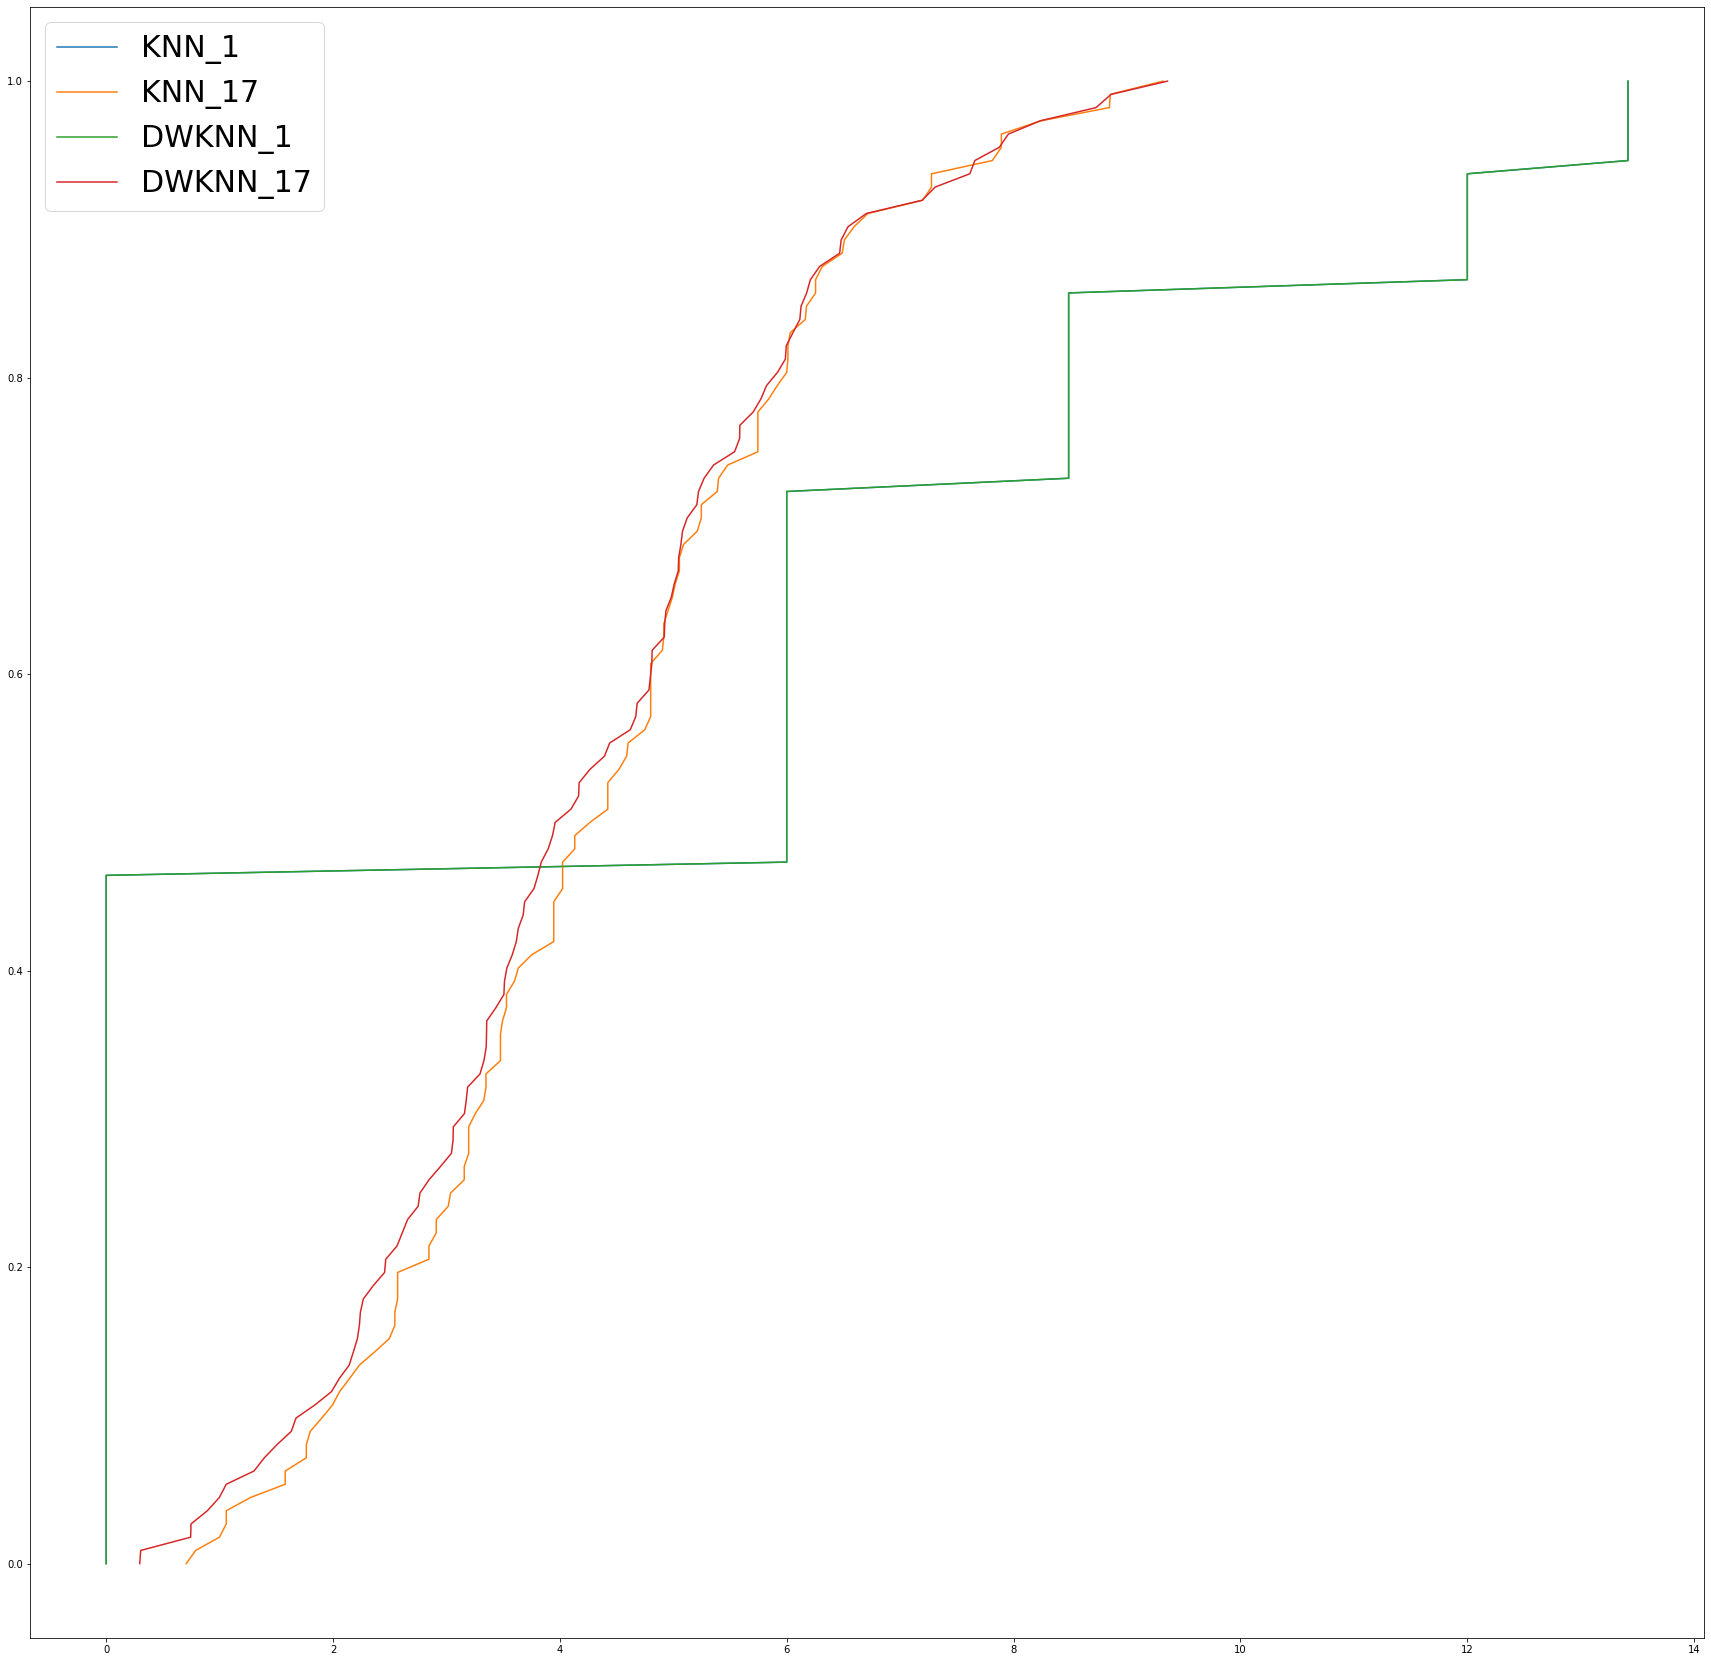

In [30]:
fig= plt.figure(figsize=(30,30))
errorDf = pd.DataFrame(index = range(0,len(X_test)))

KNN_kcomp1 = pd.read_csv('E8_KNN_T1_k1.csv')
error = KNN_kcomp1['error']
errorDf['KNNcomp1'] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")


KNN_kcomp4 = pd.read_csv('E8_KNN_T1_k17.csv')
error = KNN_kcomp4['error']
errorDf['KNNcomp4'] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_17")

#-------------

DWKNN_kcomp1 = pd.read_csv('E8_DWKNN_T1_k1.csv')
error = DWKNN_kcomp1['error']
errorDf['DWKNNcomp1'] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")


DWKNN_kcomp4 = pd.read_csv('E8_DWKNN_T1_k17.csv')
error = DWKNN_kcomp4['error']
errorDf['DWKNNcomp4'] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_17")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.show()


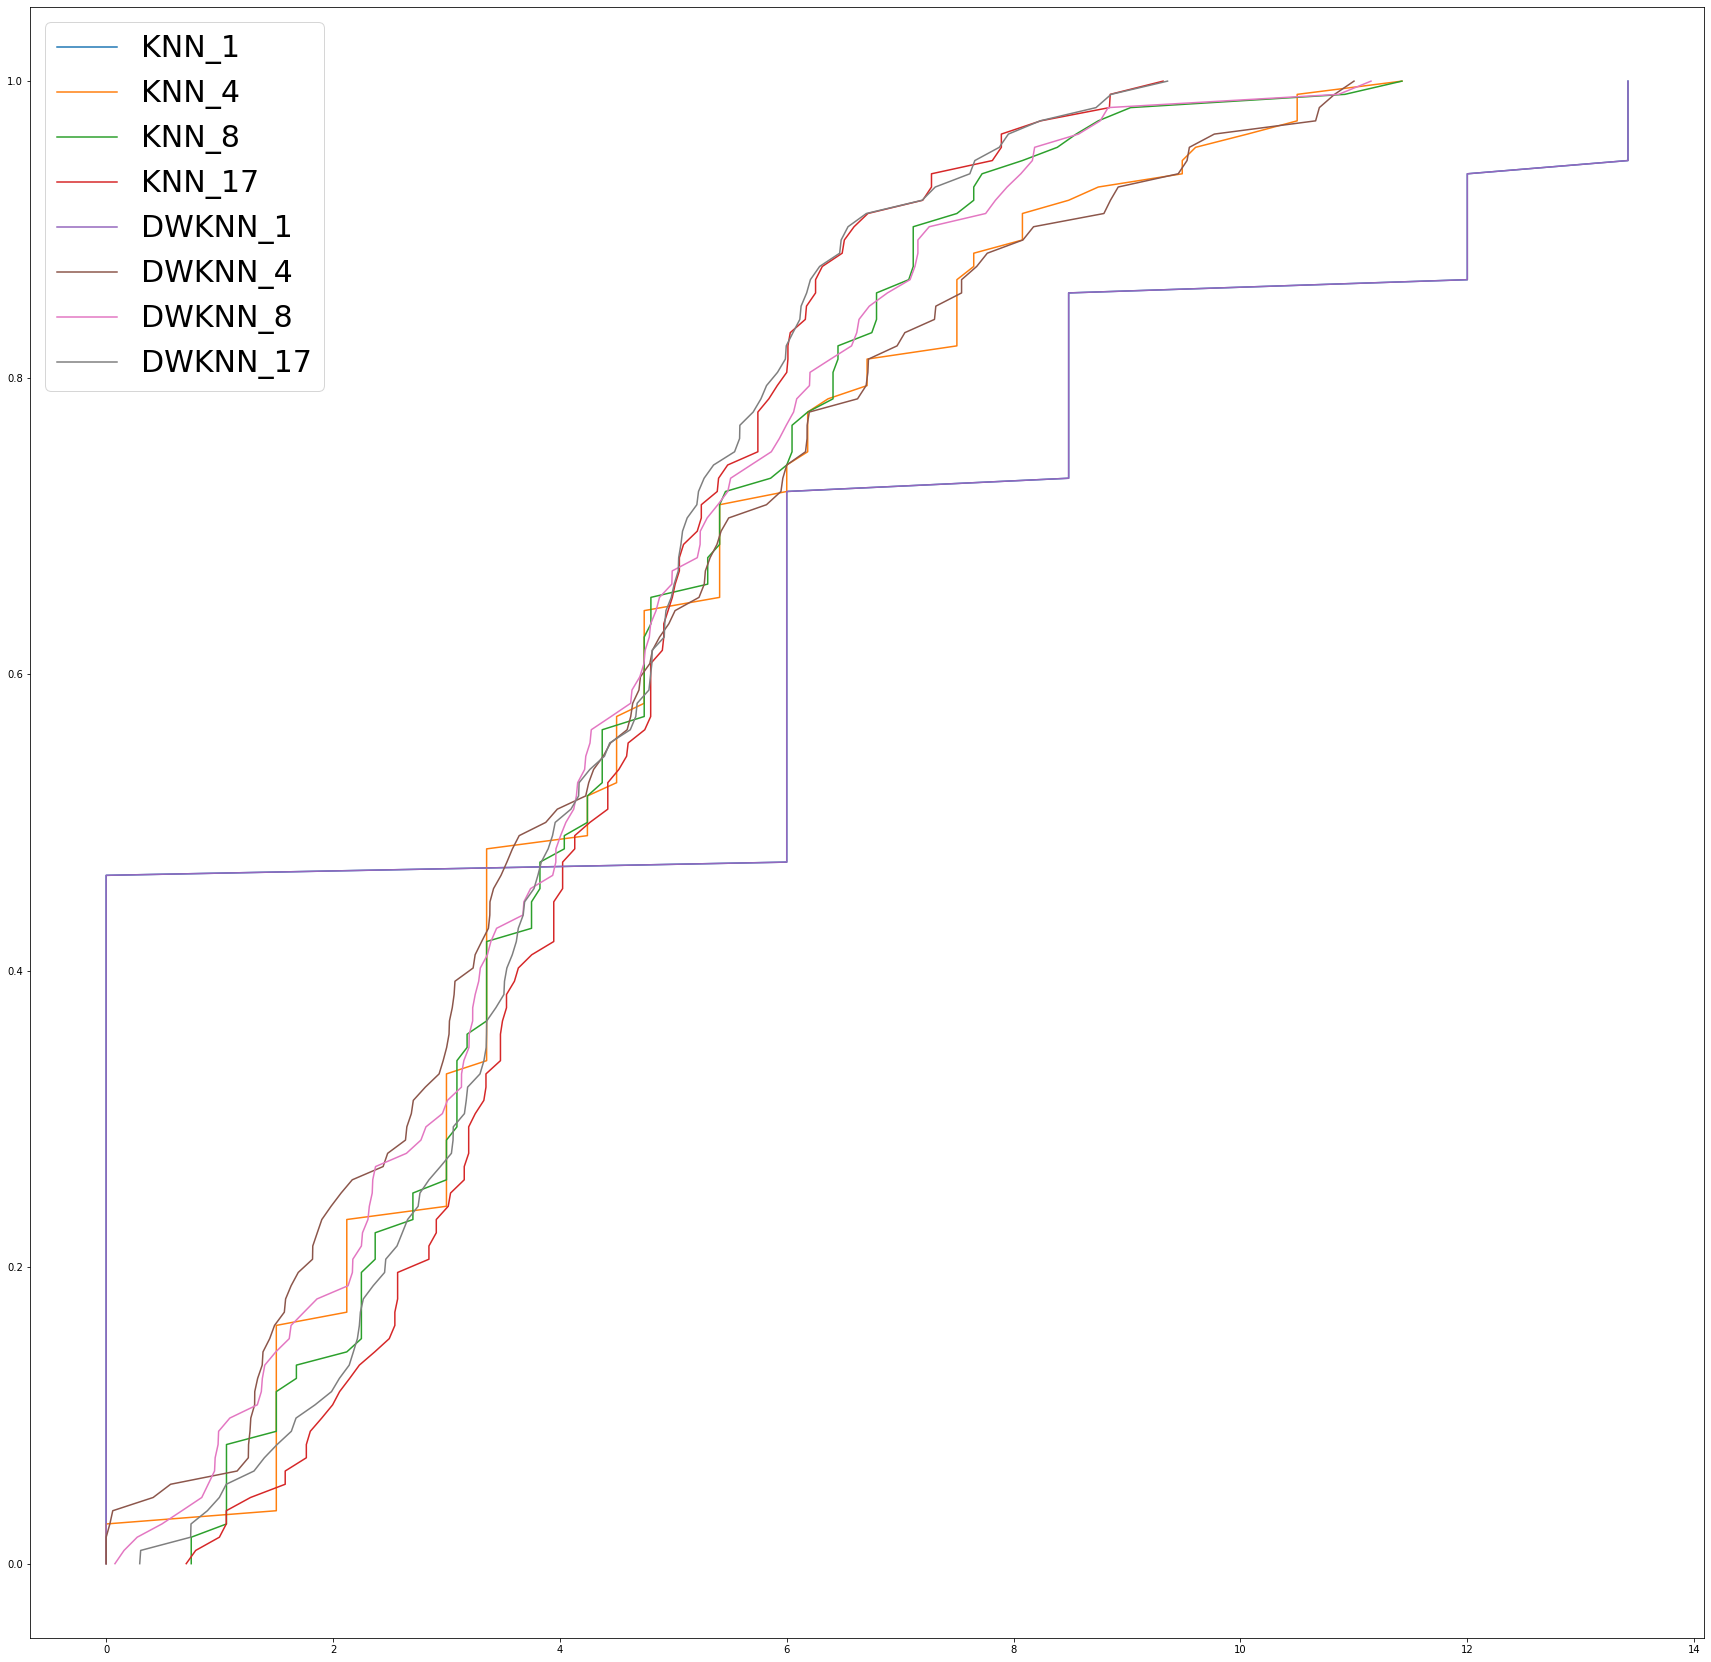

In [26]:
fig= plt.figure(figsize=(30,30))
errorDf = pd.DataFrame(index = range(0,len(X_test)))

KNN_kcomp1 = pd.read_csv('E8_KNN_T1_k1.csv')
error = KNN_kcomp1['error']
errorDf['KNNcomp1'] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")

KNN_kcomp2 = pd.read_csv('E8_KNN_T1_k4.csv')
error = KNN_kcomp2['error']
errorDf['KNNcomp2'] = error
knn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp2_error),step=1)/(len(knn_kcomp2_error)-1)
## plotting    
plt.plot(knn_kcomp2_error,cdf, label = "KNN_4")

KNN_kcomp3 = pd.read_csv('E8_KNN_T1_k8.csv')
error = KNN_kcomp3['error']
errorDf['KNNcomp3'] = error
knn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp3_error),step=1)/(len(knn_kcomp3_error)-1)
## plotting    
plt.plot(knn_kcomp3_error,cdf, label = "KNN_8")

KNN_kcomp4 = pd.read_csv('E8_KNN_T1_k17.csv')
error = KNN_kcomp4['error']
errorDf['KNNcomp4'] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_17")

#-------------

DWKNN_kcomp1 = pd.read_csv('E8_DWKNN_T1_k1.csv')
error = DWKNN_kcomp1['error']
errorDf['DWKNNcomp1'] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")

DWKNN_kcomp2 = pd.read_csv('E8_DWKNN_T1_k4.csv')
error = DWKNN_kcomp2['error']
errorDf['DWKNNcomp2'] = error
dwknn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp2_error),step=1)/(len(dwknn_kcomp2_error)-1)
## plotting    
plt.plot(dwknn_kcomp2_error,cdf, label = "DWKNN_4")

DWKNN_kcomp3 = pd.read_csv('E8_DWKNN_T1_k8.csv')
error = DWKNN_kcomp3['error']
errorDf['DWKNNcomp3'] = error
dwknn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp3_error),step=1)/(len(dwknn_kcomp3_error)-1)
## plotting    
plt.plot(dwknn_kcomp3_error,cdf, label = "DWKNN_8")

DWKNN_kcomp4 = pd.read_csv('E8_DWKNN_T1_k17.csv')
error = DWKNN_kcomp4['error']
errorDf['DWKNNcomp4'] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_17")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.show()


Median Error:
KNNcomp1      6.000000
KNNcomp2      4.242641
KNNcomp3      4.242641
KNNcomp4      4.264604
DWKNNcomp1    6.000000
DWKNNcomp2    3.875411
DWKNNcomp3    4.052786
DWKNNcomp4    3.958604
dtype: float64

0.75 Quantile ERROR:
KNNcomp1      8.485281
KNNcomp2      6.184658
KNNcomp3      6.046693
KNNcomp4      5.745466
DWKNNcomp1    8.485281
DWKNNcomp2    6.165519
DWKNNcomp3    5.864009
DWKNNcomp4    5.540158
Name: 0.75, dtype: float64

Max Error:
KNNcomp1      13.416408
KNNcomp2      11.423660
KNNcomp3      11.423660
KNNcomp4       9.317914
DWKNNcomp1    13.416408
DWKNNcomp2    11.000929
DWKNNcomp3    11.151055
DWKNNcomp4     9.357119
dtype: float64


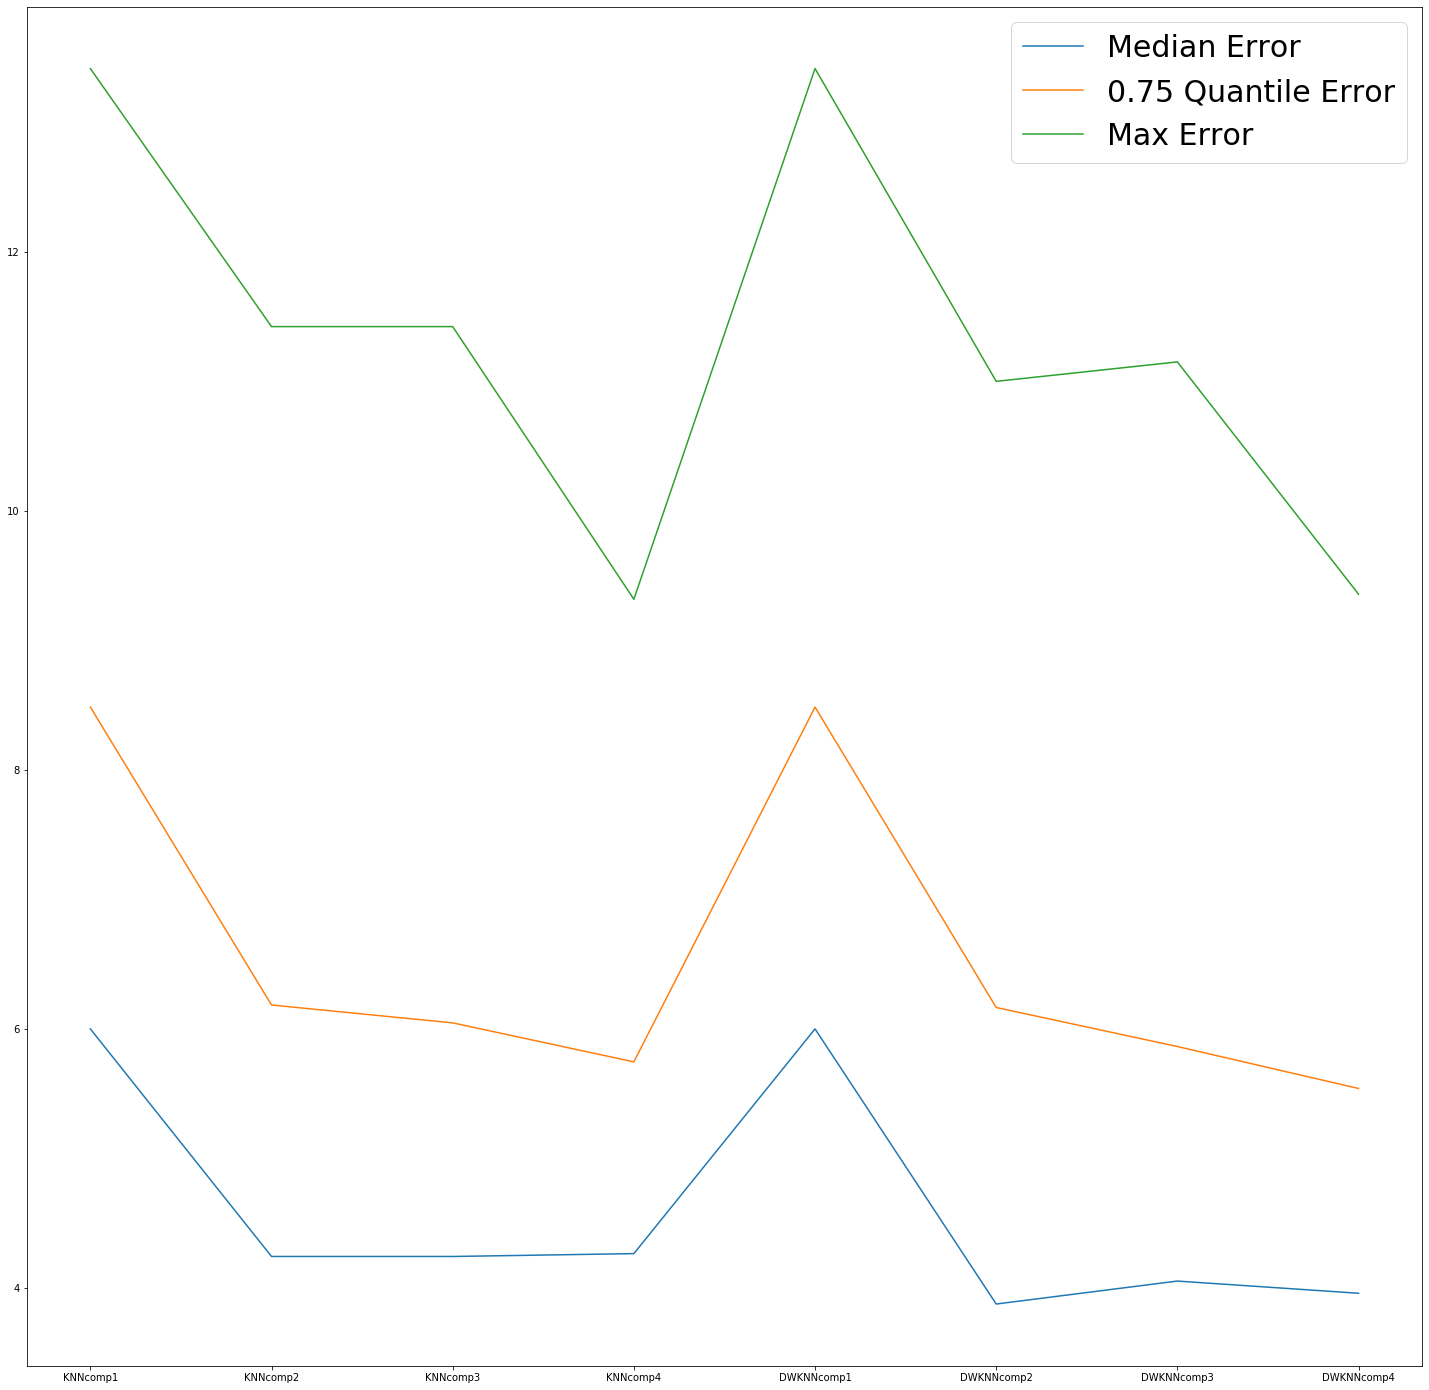

In [27]:
plt.figure(figsize = (25,25))
print("Median Error:")
print(errorDf.median())
plt.plot(errorDf.median(), label = "Median Error")
print("\n0.75 Quantile ERROR:")
print(errorDf.quantile(0.75))
plt.plot(errorDf.quantile(0.75), label = "0.75 Quantile Error")

print("\nMax Error:")
print(errorDf.max())
plt.plot(errorDf.max(), label = "Max Error")

plt.legend(loc = 'best', fontsize = 30)
plt.show()